# Plant Seedlings Image Classification 

### Objective

The goal is to differentiate a weed from a crop seedling. The ability to do so effectively can mean better crop yields and better stewardship of the environment.In this project we will see if we can differentiate a weed from a crop seedling.

We were provided with two sets of files:
 
*   images.npy
*   Label.csv


### Import Libraries

In [2]:
# Import necessary modules.

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import tensorflow as tf

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential          
from tensorflow.keras.layers import Conv2D            
from tensorflow.keras.layers import MaxPooling2D, GlobalMaxPool2D, AveragePooling2D       
from tensorflow.keras.layers import Flatten             
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

from google.colab.patches import cv2_imshow  

    
         

### Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
img_array = np.load(r'/content/drive/My Drive/Colab Notebooks/images.npy')

In [5]:
labels = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Labels.csv')

### Print shape of the data

In [6]:
img_array.shape

(4750, 128, 128, 3)

In [7]:
labels.shape

(4750, 1)

### Visualize Images

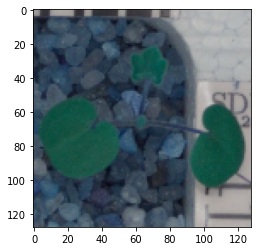

In [8]:
plt.imshow(img_array[2])
plt.show()

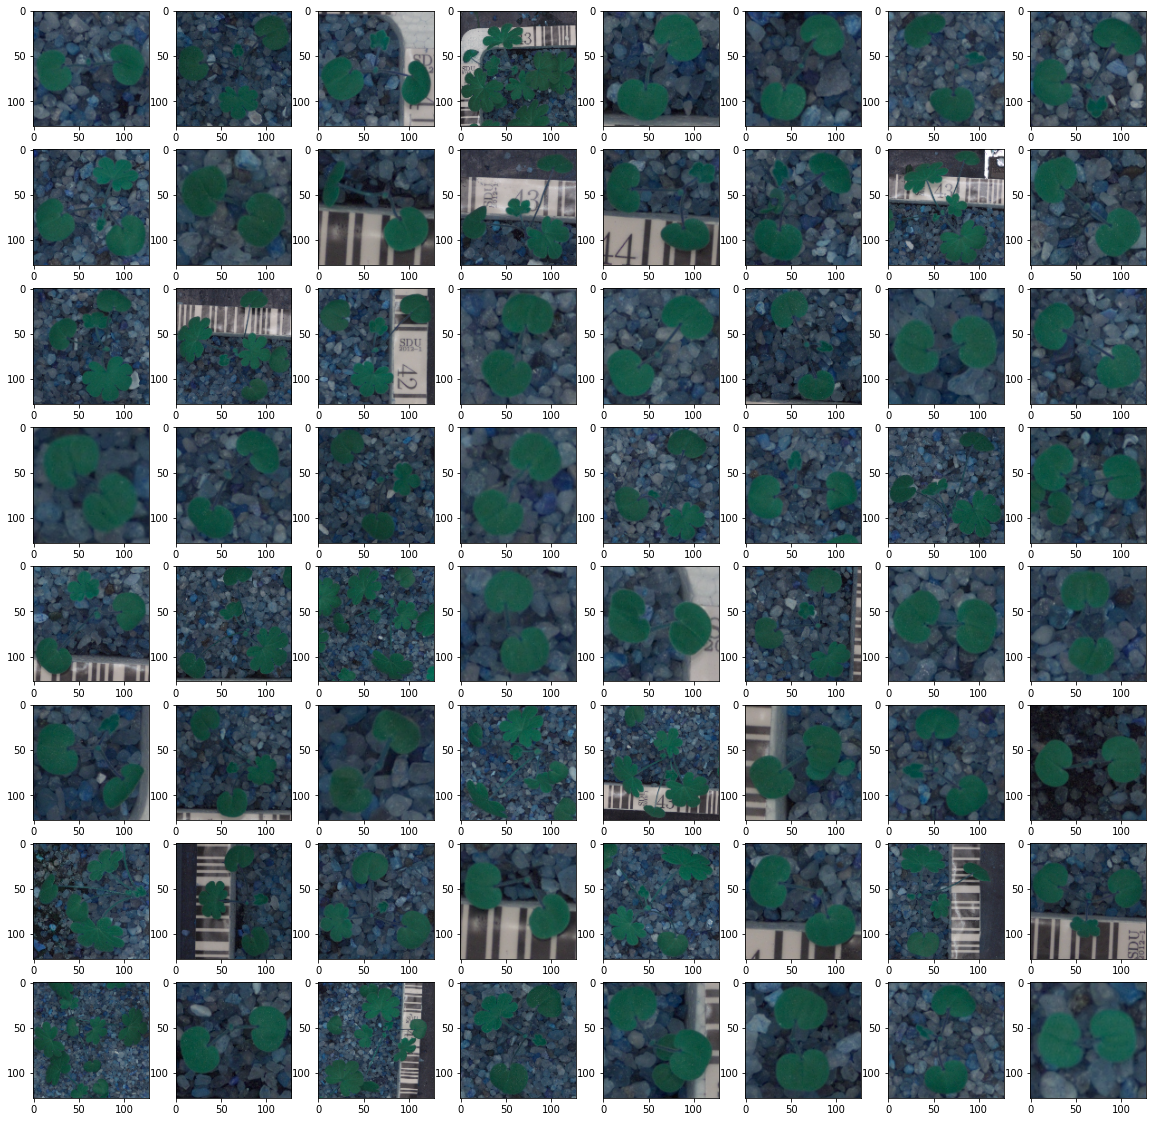

In [9]:
fig = plt.figure(figsize=(20, 20))  

for i in range(64):
    sub = fig.add_subplot(8, 8, i+1)
    sub.imshow(img_array[i])

# Data Preprocessing

### Gray Scale

Original Image:


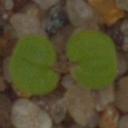

Output after grayscale conversion:


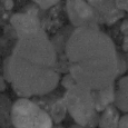

In [10]:
# Convert image to grayscale. The second argument in the following step is cv2.COLOR_BGR2GRAY, which converts colour image to grayscale.
gray = cv2.cvtColor(img_array[i], cv2.COLOR_BGR2GRAY)
print("Original Image:")
cv2_imshow(img_array[i])
print("Output after grayscale conversion:")
cv2_imshow(gray)

In [11]:
grayscale = np.zeros(img_array.shape[:-1])
for i in range(img_array.shape[0]): 
   grayscale[i] = cv2.cvtColor(img_array[i], cv2.COLOR_BGR2GRAY) 

In [12]:
grayscale.shape

(4750, 128, 128)

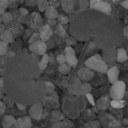

In [13]:
cv2_imshow(grayscale[7])

### Gausian Blurring

Original Image:



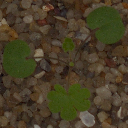


 Output after first gaussian blurring: 



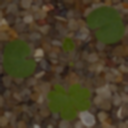


 Output after second gaussian blurring: 



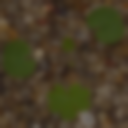

In [14]:
Gaussian1 = cv2.GaussianBlur(img_array[1], (5, 5), 0)
Gaussian2 = cv2.GaussianBlur(img_array[1], (15, 15), 0)
print('Original Image:\n')
cv2_imshow(img_array[1])
print('\n Output after first gaussian blurring: \n')
cv2_imshow(Gaussian1)
print('\n Output after second gaussian blurring: \n')
cv2_imshow(Gaussian2)

Original Image:



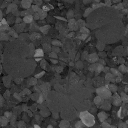


 Output after first gaussian blurring: 



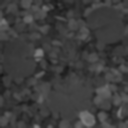


 Output after second gaussian blurring: 



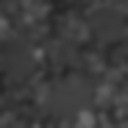

In [15]:
Gaussian1 = cv2.GaussianBlur(grayscale[1], (5, 5), 0)
Gaussian2 = cv2.GaussianBlur(grayscale[1], (15, 15), 0)
print('Original Image:\n')
cv2_imshow(grayscale[1])
print('\n Output after first gaussian blurring: \n')
cv2_imshow(Gaussian1)
print('\n Output after second gaussian blurring: \n')
cv2_imshow(Gaussian2)

In [16]:
Gaussian = cv2.GaussianBlur(grayscale, (5, 5), 0)

In [17]:
Gaussian.shape

(4750, 128, 128)

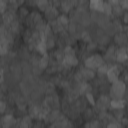

In [18]:
cv2_imshow(Gaussian[7])

### Normalization

In [19]:
# Normalize the data
Norm_array = img_array.astype('float32') / 255.0

In [20]:
# Normalize the data
Norm_gray_array = grayscale.astype('float32') / 255.0

In [21]:
Norm_array.shape

(4750, 128, 128, 3)

In [22]:
Norm_gray_array.shape

(4750, 128, 128)

# Make data compatible

### Convert labels to one-hot-vectors

In [23]:
y = labels.apply(lambda x: x.tolist(), axis=1)

In [24]:
(unique, counts) = np.unique(y, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[list(['Black-grass']) 263]
 [list(['Charlock']) 390]
 [list(['Cleavers']) 287]
 [list(['Common Chickweed']) 611]
 [list(['Common wheat']) 221]
 [list(['Fat Hen']) 475]
 [list(['Loose Silky-bent']) 654]
 [list(['Maize']) 221]
 [list(['Scentless Mayweed']) 516]
 [list(['Shepherds Purse']) 231]
 [list(['Small-flowered Cranesbill']) 496]
 [list(['Sugar beet']) 385]]


In [25]:
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
labels_en = labelencoder.fit_transform(labels)
y = to_categorical(labels_en, num_classes=12)
print("Shape of lables", y.shape)
print("One value of labels", y[0])


Shape of lables (4750, 12)
One value of labels [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Split Data into Test and Train

In [26]:
X_train, X_test, y_train, y_test = train_test_split(Norm_array, y, test_size=0.3, random_state=42)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3325, 128, 128, 3)
(3325, 12)
(1425, 128, 128, 3)
(1425, 12)


In [28]:
X_gray_train, X_gray_test, y_gray_train, y_gray_test = train_test_split(Norm_gray_array, y, test_size=0.3, random_state=42)

In [29]:
print(X_gray_train.shape)
print(y_gray_train.shape)
print(X_gray_test.shape)
print(y_gray_test.shape)

(3325, 128, 128)
(3325, 12)
(1425, 128, 128)
(1425, 12)


### Reshape Data

In [30]:
X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)

In [31]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])
print("Max value in X_train:", X_train.max())
print("Min value in X_train:", X_train.min())

X_train shape: (3325, 128, 128, 3)
Images in X_train: 3325
Images in X_test: 1425
Max value in X_train: 1.0
Min value in X_train: 0.0


In [32]:
X_gray_train = X_gray_train.reshape(X_gray_train.shape[0], 128, 128, 1)
X_gray_test = X_gray_test.reshape(X_gray_test.shape[0], 128, 128, 1)

In [33]:
print("X_gray_train shape:", X_gray_train.shape)
print("Images in X_train:", X_gray_train.shape[0])
print("Images in X_test:", X_gray_test.shape[0])
print("Max value in X_train:", X_gray_train.max())
print("Min value in X_train:", X_gray_train.min())

X_gray_train shape: (3325, 128, 128, 1)
Images in X_train: 3325
Images in X_test: 1425
Max value in X_train: 1.0
Min value in X_train: 0.003921569


### Print Labels for y[0]

In [34]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

#  Model Developmet

### Defining the Layers - GrayScale

In [35]:
# Clear memory
tf.keras.backend.clear_session()

# Initialising the CNN classifier
model_gray = Sequential()

# Adding a Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
model_gray.add(Conv2D(filters=64, kernel_size=3, strides= 2, activation="relu", input_shape=(128, 128, 1)))

# Adding a Max Pooling layer of size 2X2
model_gray.add(MaxPooling2D(pool_size = (3, 3)))

# Adding a Batch Normalization
model_gray.add(BatchNormalization())

# Adding another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
model_gray.add(Conv2D(filters=32, kernel_size=3, strides= 1, activation="relu"))

# Adding a Max Pooling layer of size 2X2
model_gray.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a Batch Normalization
model_gray.add(BatchNormalization())

# Adding another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
model_gray.add(Conv2D(filters=32, kernel_size=3, strides= 2, activation="relu"))

# Adding a Global Max Pooling layer 
model_gray.add(GlobalMaxPool2D())

# Flattening the layer before fully connected layers
model_gray.add(Flatten())

# Adding a fully connected layer with 256 neurons
model_gray.add(Dense(units = 256, activation = 'relu'))

# Adding dropout with probability 0.5
model_gray.add(Dropout(0.5))

# Adding a fully connected layer with 128 neurons
model_gray.add(Dense(128, activation="relu"))

# Adding dropout with probability 0.5
model_gray.add(Dropout(0.5))

# The final output layer with 12 neurons to predict the categorical classifcation
model_gray.add(Dense(12, activation="softmax"))

## Defining the Layers - Color

In [36]:
# Clear memory
tf.keras.backend.clear_session()

# Initialising the CNN classifier
model = Sequential()

# Adding a Convolution layer with 64 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(filters=64, kernel_size=3, strides= 2, activation="relu", input_shape=(128, 128, 3)))

# Adding a Max Pooling layer of size 2X2
model.add(MaxPooling2D(pool_size = (3, 3)))

# Adding a Batch Normalization
model.add(BatchNormalization())

# Adding another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(filters=32, kernel_size=3, strides= 1, activation="relu"))

# Adding a Max Pooling layer of size 2X2
model.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a Batch Normalization
model.add(BatchNormalization())

# Adding another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
model.add(Conv2D(filters=32, kernel_size=3, strides= 2, activation="relu"))

# Adding a Global Max Pooling layer 
model.add(GlobalMaxPool2D())

# Flattening the layer before fully connected layers
model.add(Flatten())

# Adding a fully connected layer with 256 neurons
model.add(Dense(units = 256, activation = 'relu'))

# Adding dropout with probability 0.5
model.add(Dropout(0.5))

# Adding a fully connected layer with 128 neurons
model.add(Dense(128, activation="relu"))

# Adding dropout with probability 0.5
model.add(Dropout(0.5))

# The final output layer with 12 neurons to predict the categorical classifcation
model.add(Dense(12, activation="softmax"))

## Setting Optimizer and Loss Fuction

In [37]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

## Compiling GrayScale

In [38]:
model_gray.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

In [39]:
history_gray = model_gray.fit( x=X_gray_train, y=y_gray_train, batch_size=32, epochs=100, validation_split = 0.3)

Epoch 1/100
73/73 [==============================] - 8s 15ms/step - loss: 2.6746 - accuracy: 0.1027 - val_loss: 2.4468 - val_accuracy: 0.1353
Epoch 2/100
73/73 [==============================] - 1s 9ms/step - loss: 2.3954 - accuracy: 0.1666 - val_loss: 2.4041 - val_accuracy: 0.1353
Epoch 3/100
73/73 [==============================] - 1s 9ms/step - loss: 2.3575 - accuracy: 0.1585 - val_loss: 2.3934 - val_accuracy: 0.1403
Epoch 4/100
73/73 [==============================] - 1s 9ms/step - loss: 2.2943 - accuracy: 0.1910 - val_loss: 2.4223 - val_accuracy: 0.1663
Epoch 5/100
73/73 [==============================] - 1s 9ms/step - loss: 2.2470 - accuracy: 0.2028 - val_loss: 2.6814 - val_accuracy: 0.1343
Epoch 6/100
73/73 [==============================] - 1s 9ms/step - loss: 2.1280 - accuracy: 0.2435 - val_loss: 3.5520 - val_accuracy: 0.1343
Epoch 7/100
73/73 [==============================] - 1s 9ms/step - loss: 1.9732 - accuracy: 0.3028 - val_loss: 4.0239 - val_accuracy: 0.1343
Epoch 8/100


In [40]:
hist_gray = pd.DataFrame(history_gray.history)
hist_gray['epoch'] = history_gray.epoch
print(hist_gray.info)

<bound method DataFrame.info of         loss  accuracy  val_loss  val_accuracy  epoch
0   2.515472  0.113451  2.446836      0.135271      0
1   2.388899  0.160292  2.404129      0.135271      1
2   2.352928  0.165449  2.393448      0.140281      2
3   2.306199  0.183928  2.422287      0.166333      3
4   2.218785  0.216588  2.681360      0.134269      4
..       ...       ...       ...           ...    ...
95  0.208736  0.930812  4.531981      0.362725     95
96  0.250323  0.917920  5.092999      0.354709     96
97  0.225180  0.925226  5.058702      0.375751     97
98  0.239808  0.922217  4.200476      0.371744     98
99  0.233968  0.929523  4.333611      0.348697     99

[100 rows x 5 columns]>


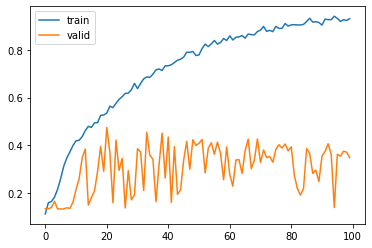

In [41]:
plt.plot(hist_gray['accuracy'])
plt.plot(hist_gray['val_accuracy'])
plt.legend(("train", "valid"), loc = 0)

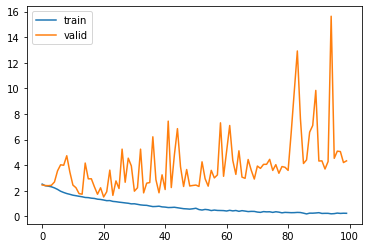

In [42]:
plt.plot(hist_gray['loss'])
plt.plot(hist_gray['val_loss'])
plt.legend(("train", "valid"), loc = 0)

## Compiling Color

In [43]:
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

In [44]:
history_color = model.fit( x=X_train, y=y_train, batch_size=32, epochs=100, validation_split = 0.3)

Epoch 1/100
73/73 [==============================] - 1s 12ms/step - loss: 2.4707 - accuracy: 0.1605 - val_loss: 2.6872 - val_accuracy: 0.1343
Epoch 2/100
73/73 [==============================] - 1s 10ms/step - loss: 1.9255 - accuracy: 0.3199 - val_loss: 4.7035 - val_accuracy: 0.1343
Epoch 3/100
73/73 [==============================] - 1s 10ms/step - loss: 1.6308 - accuracy: 0.4274 - val_loss: 5.0055 - val_accuracy: 0.1343
Epoch 4/100
73/73 [==============================] - 1s 10ms/step - loss: 1.4803 - accuracy: 0.4843 - val_loss: 3.0689 - val_accuracy: 0.2064
Epoch 5/100
73/73 [==============================] - 1s 10ms/step - loss: 1.3136 - accuracy: 0.5320 - val_loss: 3.0258 - val_accuracy: 0.1854
Epoch 6/100
73/73 [==============================] - 1s 10ms/step - loss: 1.3146 - accuracy: 0.5355 - val_loss: 1.6464 - val_accuracy: 0.4098
Epoch 7/100
73/73 [==============================] - 1s 10ms/step - loss: 1.1737 - accuracy: 0.5824 - val_loss: 1.4834 - val_accuracy: 0.4459
Epoch 

In [45]:
hist_color = pd.DataFrame(history_color.history)
hist_color['epoch'] = history_color.epoch
print(hist_color.info)

<bound method DataFrame.info of         loss  accuracy  val_loss  val_accuracy  epoch
0   2.283680  0.201547  2.687207      0.134269      0
1   1.873889  0.339063  4.703485      0.134269      1
2   1.603708  0.443060  5.005482      0.134269      2
3   1.478003  0.492480  3.068893      0.206413      3
4   1.313655  0.541040  3.025811      0.185371      4
..       ...       ...       ...           ...    ...
95  0.113611  0.968629  1.899446      0.681363     95
96  0.079954  0.974216  1.544681      0.768537     96
97  0.063331  0.981951  2.053023      0.698397     97
98  0.101641  0.966910  1.391298      0.744489     98
99  0.118407  0.965621  1.658560      0.739479     99

[100 rows x 5 columns]>


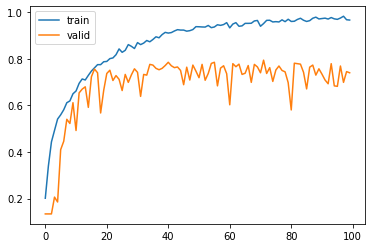

In [46]:
plt.plot(hist_color['accuracy'])
plt.plot(hist_color['val_accuracy'])
plt.legend(("train", "valid"), loc = 0)

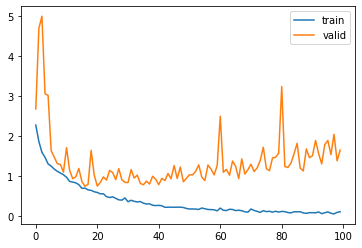

In [47]:
plt.plot(hist_color['loss'])
plt.plot(hist_color['val_loss'])
plt.legend(("train", "valid"), loc = 0)

## Conclusion 
The gray scale model doesnt seem to perform as well with training accuracy of 95% and validation accuracy of 31%. But the model trained on the colored images shows promising results with the accuracy of 98% and the validation accuraacy of 76%. Still it seems like both the models are overfitting. For the reaminder of the project I will use the color image model.

# Model Evaluation

In [48]:
model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 5ms/step - loss: 1.7127 - accuracy: 0.7284


[1.7126505374908447, 0.7284210324287415]

In [49]:
y_pred = model.predict(X_test)

In [50]:
y_pred.shape

(1425, 12)

In [51]:
yprednew= np.argmax(y_pred, axis=1)

In [52]:
y_test.shape

(1425, 12)

In [53]:
ytstnew= np.argmax(y_test, axis=1)

In [54]:
ytstnew.shape

(1425,)

### Confusion Matrix

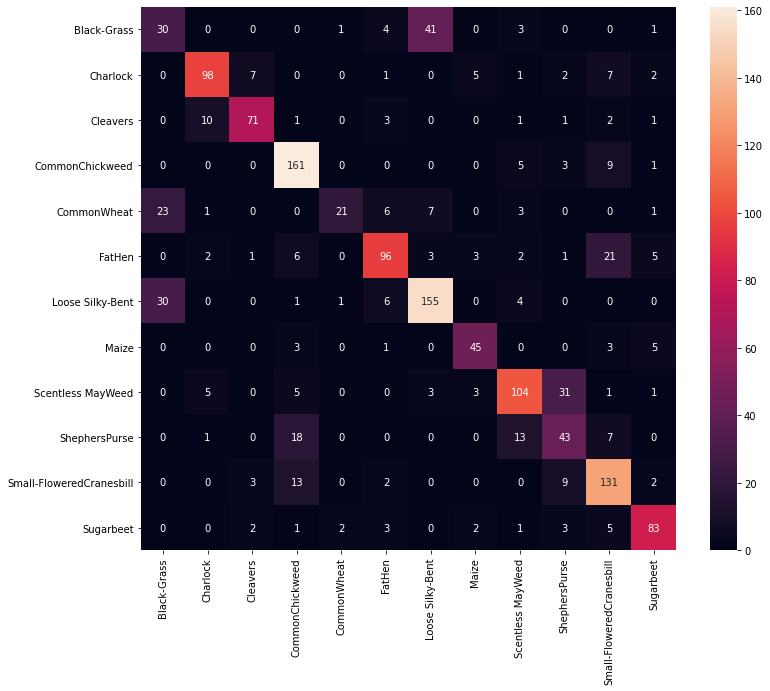

In [55]:
cm= metrics.confusion_matrix(ytstnew, yprednew, labels=[0,1,2,3,4,5,6,7,8,9,10,11])
df_cm = pd.DataFrame(cm, index = [i for i in ["Black-Grass","Charlock","Cleavers", "CommonChickweed", "CommonWheat", "FatHen", "Loose Silky-Bent", "Maize", "Scentless MayWeed", "ShephersPurse", "Small-FloweredCranesbill", "Sugarbeet"]],
                  columns = [i for i in ["Black-Grass","Charlock","Cleavers", "CommonChickweed", "CommonWheat", "FatHen", "Loose Silky-Bent", "Maize", "Scentless MayWeed", "ShephersPurse", "Small-FloweredCranesbill", "Sugarbeet"]])
plt.figure(figsize = (12,10))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [74]:
df_cm['Total'] =df_cm.sum(axis=0)

In [82]:
df_cm['Accurate'] = ['30', '98', '71', '161', '21', '96', '155', '45', '104', '43', '131', '83'] 

In [85]:
df_cm['Accuracy'] = df_cm['Accurate'].astype('float32') / df_cm['Total'].astype('float32')

In [89]:
df_cm['Accuracy']

Black-Grass                 0.361446
Charlock                    0.837607
Cleavers                    0.845238
CommonChickweed             0.770335
CommonWheat                 0.840000
FatHen                      0.786885
Loose Silky-Bent            0.741627
Maize                       0.775862
Scentless MayWeed           0.759124
ShephersPurse               0.462366
Small-FloweredCranesbill    0.704301
Sugarbeet                   0.813725
Name: Accuracy, dtype: float32

### Conclusion : 
 

*   Black-Grass and ShephersPurse has lowest accuracies
*   The model seems to be having a dificulty in distinguishing between Black Grass and Loose Silky Bent. 
*   Also it seems to be misclassifying ShephersPurse as Common Chickweed or Sentless Mayweed.




# Visulaizing Prediction

In [57]:
lookup = {
  0 : 'Black-Grass',
  1 : "Charlock",
  2 : "Cleavers",
  3 : "CommonChickweed",
  4 :  "CommonWheat", 
  5 : "FatHen", 
  6 : "Loose Silky-Bent",
  7 : "Maize", 
  8 : "Scentless MayWeed",
  9 : "ShephersPurse", 
  10 : "Small-FloweredCranesbill",
  11 : "Sugarbeet"
}
print(lookup)

{0: 'Black-Grass', 1: 'Charlock', 2: 'Cleavers', 3: 'CommonChickweed', 4: 'CommonWheat', 5: 'FatHen', 6: 'Loose Silky-Bent', 7: 'Maize', 8: 'Scentless MayWeed', 9: 'ShephersPurse', 10: 'Small-FloweredCranesbill', 11: 'Sugarbeet'}


In [58]:
X_test.shape

(1425, 128, 128, 3)

Softmax Outputs: [[4.4860347e-19 6.7315917e-14 5.6409525e-12 3.4585377e-04 4.4597220e-20
  1.3418311e-06 4.3324054e-17 8.2224938e-10 3.7025660e-17 5.1516736e-06
  9.9964762e-01 1.9528402e-12]]
0.99999994
Predicted label: Small-FloweredCranesbill
Actual: Small-FloweredCranesbill


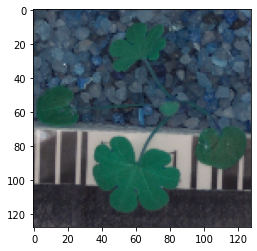

In [59]:
plt.imshow(X_test[2].reshape(128, 128, 3), cmap='gray')
y_pred = model.predict(X_test[2].reshape(1,128, 128, 3))
print("Softmax Outputs:", y_pred)
print(y_pred.sum())
print("Predicted label:", lookup[y_pred.argmax()])
print("Actual:", lookup[ytstnew[2]])

Softmax Outputs: [[1.8414672e-14 9.9999893e-01 8.0283218e-07 5.9990842e-13 1.2972724e-12
  6.4799383e-10 8.1703287e-14 2.0744527e-07 4.3285736e-10 8.5617489e-13
  1.1230100e-09 9.7638102e-09]]
0.9999999
Predicted label: Charlock
Actual: Charlock


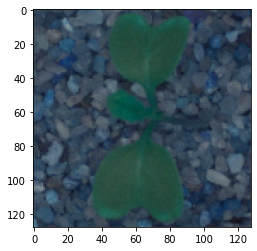

In [60]:
plt.imshow(X_test[3].reshape(128, 128, 3), cmap='gray')
y_pred = model.predict(X_test[3].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred)
print(y_pred.sum())
print("Predicted label:", lookup[y_pred.argmax()])
print("Actual:", lookup[ytstnew[3]])

Softmax Outputs: [[1.8534516e-06 2.3133119e-03 4.3255568e-04 1.1210172e-02 2.6669395e-06
  8.5868075e-04 5.4474694e-05 1.6481020e-02 3.7188911e-01 5.9179461e-01
  3.0184875e-03 1.9430602e-03]]
1.0
Predicted label: ShephersPurse
Actual: Scentless MayWeed


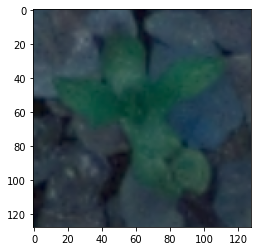

In [61]:
plt.imshow(X_test[33].reshape(128, 128,3), cmap='gray')
y_pred = model.predict(X_test[33].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred)
print(y_pred.sum())
print("Predicted label:", lookup[y_pred.argmax()])
print("Actual:", lookup[ytstnew[33]])

Softmax Outputs: [[6.3709624e-09 2.5560494e-08 8.2375260e-07 2.1046685e-02 4.4137244e-10
  8.1911284e-01 1.0776083e-06 6.0807261e-06 1.0811273e-05 4.8168741e-02
  1.1165205e-01 9.5144043e-07]]
1.0
Predicted label: FatHen
Actual: FatHen


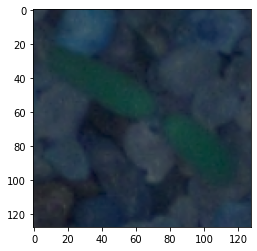

In [62]:
plt.imshow(X_test[36].reshape(128, 128, 3), cmap='gray')
y_pred = model.predict(X_test[36].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred)
print(y_pred.sum())
print("Predicted label:", lookup[y_pred.argmax()])
print("Actual:", lookup[ytstnew[36]])

Softmax Outputs: [[2.6749952e-10 9.7766751e-01 1.9306114e-02 3.2043468e-07 2.2217083e-07
  7.0482102e-04 9.0942116e-09 4.6225204e-04 2.5213494e-08 2.4773356e-06
  1.8557050e-03 5.1551342e-07]]
1.0
Predicted label: Charlock
Actual: Charlock


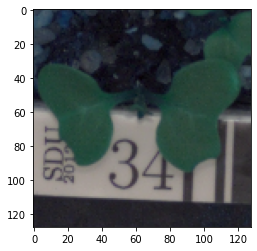

In [63]:
plt.imshow(X_test[59].reshape(128, 128,3), cmap='gray')
y_pred = model.predict(X_test[59].reshape(1, 128, 128, 3))
print("Softmax Outputs:", y_pred)
print(y_pred.sum())
print("Predicted label:", lookup[y_pred.argmax()])
print("Actual:", lookup[ytstnew[59]])

# THE END!!!









